# Solutions Homework 5: PageRank

## Exercise 1. (How to compute PageRank with  Networkx)

In this exercise  we will use the python package Networkx.

{'a': 0.06459056912032608,
 'b': 0.13902843128508197,
 'c': 0.09077700069643925,
 'd': 0.11739313753278623,
 'e': 0.08993848995783815,
 'f': 0.08931843439060613,
 'g': 0.09114847061984602,
 'h': 0.11372529009303206,
 'i': 0.08810845372859825,
 'j': 0.11597172257544569}

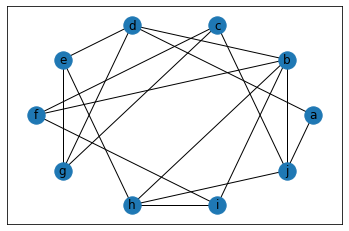

In [1]:
import itertools #implements a number of iterator building blocks
import random

import networkx as nx
from matplotlib import pyplot as plt


nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j']

# Generate Networkx Graph
G = nx.Graph()
G.add_nodes_from(nodes)

# randomly determine vertices
for (node1, node2) in itertools.combinations(nodes, 2):
    if random.uniform(0,1) < 0.5:
        G.add_edge(node1, node2)

# Draw generated graph
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=True)

# Compute Page Rank
pr = nx.pagerank(G, alpha=0.85)


pr


2. For "dolphins network":

In [ ]:
dolphins_graph = nx.Graph()
dolphins_graph = nx.read_gml('./dolphins.gml')

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
# The above script changes the default size of the Matplotlib plots to 10 x 8 inches.

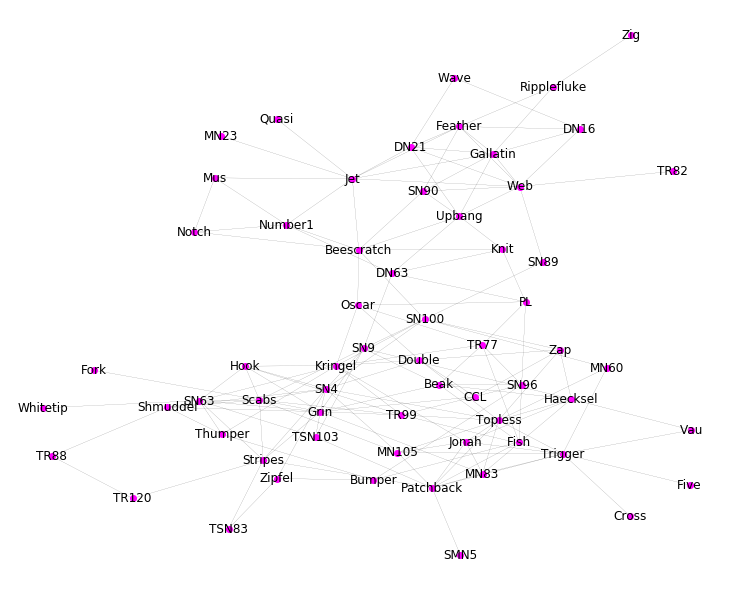

In [ ]:
options = {
    "node_color": "magenta",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
    "font_size":12
}

nx.draw_kamada_kawai(dolphins_graph, with_labels=True,**options)


In [ ]:
pr = nx.pagerank(dolphins_graph, alpha=0.45)# alpha is the Damping parameter for PageRank (probability to follow the outgoing links in formultion with taxation)
plt.show()
pr

{'Beak': 0.015835931541945618,
 'Beescratch': 0.02045448564725956,
 'Bumper': 0.015272006353948334,
 'CCL': 0.012348463394801171,
 'Cross': 0.010172208984935989,
 'DN16': 0.015248830862876211,
 'DN21': 0.017807720937843823,
 'DN63': 0.015567875672052306,
 'Double': 0.016255061530325788,
 'Feather': 0.019554232606604285,
 'Fish': 0.015432039958734775,
 'Five': 0.010172208984935989,
 'Fork': 0.009926795321870348,
 'Gallatin': 0.020805258243257664,
 'Grin': 0.023689989353819,
 'Haecksel': 0.018138431002371395,
 'Hook': 0.015010641205674686,
 'Jet': 0.027890302830726486,
 'Jonah': 0.016701295601095272,
 'Knit': 0.013998581166894947,
 'Kringel': 0.01995848095826246,
 'MN105': 0.015281573885014731,
 'MN23': 0.010265587932492179,
 'MN60': 0.012286591958345024,
 'MN83': 0.015366884916328961,
 'Mus': 0.013832910812657234,
 'Notch': 0.013620518178399908,
 'Number1': 0.016935248962974183,
 'Oscar': 0.014884849645574507,
 'Patchback': 0.02311219132755302,
 'PL': 0.015686248201207655,
 'Quasi': 0.0

We see that for an undirected graph, the rank of a node is correlated to its degree. 

##  Exercise 2 (PageRank for Sports Analytics)
Start by reading the data from 'NCAA2.csv' file available on the Moodle. Take a look at the data.

In [6]:
import pandas as pd
df = pd.read_csv('sample_data/NCAA2.csv')
df.head()

,GameId,GameDate,NeutralSite,AwayTeam,HomeTeam,Team,Home,Score,AST,TOV,...,Rebounds,ORB,DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls
0,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Notre Dame Fighting Irish,0,66,13,11,...,30,13,17,56,23,13,34,13,7,10
1,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Virginia Tech Hokies,1,81,19,7,...,24,2,22,55,33,11,18,5,4,13
2,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,Miami (FL) Hurricanes,1,82,12,7,...,27,9,18,61,28,10,25,29,16,14
3,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,North Carolina State Wolfpack,0,87,17,16,...,50,17,33,68,31,11,30,18,14,23
4,3,1/5/2019 3:27,0,Clemson Tigers,Duke Blue Devils,Clemson Tigers,0,68,14,16,...,35,9,26,63,27,6,15,12,8,16


Next, for each game we find the difference between scores and send it to a list:
* `to_list=tolist` put values into a list; 
* `groupby` group by GameId the diff of scores; 
* `diff()` takes diff with previous row (as we have two rows, we get `nan` for the diff of the first row and the unexciting previous one)

In [8]:
import numpy as np
scores = df.groupby('GameId')['Score'].diff().to_list()

Next we get rid of `nan` and duplicate  our scores with the opposite sign 
* `[]` creates a new list; 
* `idx` is short for index;  
* `numpy.isnan` tests element-wise for NaN and return result as a boolean array
* `enumerate(scores)` is a couple (position in the list, corresponding value)

In [9]:
scores = [scores[idx+1]*(-1) if np.isnan(s) == True else s for idx,s in enumerate(scores)] 

Add a new variable `delta`= scores to our data frame:

In [10]:
df['delta'] = scores
df.head()

,GameId,GameDate,NeutralSite,AwayTeam,HomeTeam,Team,Home,Score,AST,TOV,...,ORB,DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls,delta
0,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Notre Dame Fighting Irish,0,66,13,11,...,13,17,56,23,13,34,13,7,10,-15.0
1,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Virginia Tech Hokies,1,81,19,7,...,2,22,55,33,11,18,5,4,13,15.0
2,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,Miami (FL) Hurricanes,1,82,12,7,...,9,18,61,28,10,25,29,16,14,-5.0
3,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,North Carolina State Wolfpack,0,87,17,16,...,17,33,68,31,11,30,18,14,23,5.0
4,3,1/5/2019 3:27,0,Clemson Tigers,Duke Blue Devils,Clemson Tigers,0,68,14,16,...,9,26,63,27,6,15,12,8,16,-19.0


Next we build edges between teams:
* `df.iterrows` iterates over DataFrame rows as (index, Series) pairs.
* `if idx % 2` looking only on the rows with the odd index

In [11]:
edges = []
for idx,row in df.iterrows():
  if idx % 2 == 1:
    continue
  else:
    away = row[3]
    home = row[4]
    relative_team = row[5]
    delta = row[22]
    
    if relative_team == away:
      delta = -1* delta

    if delta > 0:
      winner = home
      loser = away
      points = delta
    elif delta <0:
      winner = away
      loser = home
      points = delta * -1
    else:
      continue

    edges.append((loser,winner,points)) 
edges[1]

('Miami (FL) Hurricanes', 'North Carolina State Wolfpack', 5.0)

Next we create a graph using `igraph` package:

In [14]:
import igraph
from igraph import Graph
game_graph = igraph.Graph.TupleList(edges,weights=True,directed=True)#create the graph

In [19]:
!pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 342 kB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly


Take a look on our graph:

In [20]:
g=game_graph
igraph.plot(g, vertex_label = game_graph.vs['name'], )

AttributeError: ignored

The following code computes and displays the ranking of the teams:
* `zip()` join two tuples together
* `sorted()`  builds a new sorted list from an iterable.
* `items()` displays a list of a given dictionary's (key, value) tuple pair.
* `operator.itemgetter(1)` returns the first element
* `{}` defines a dictionary 

In [18]:
import operator
vectors = game_graph.pagerank()#creates the vector of rankings
e = {name:cen for cen, name in  zip([v for v in vectors],game_graph.vs['name'])}#we create a dict. with the names and scores
sorted_eigen = sorted(e.items(), key=operator.itemgetter(1),reverse=True)#we sort the teams accordingly the rankings
sorted_eigen

[('Duke Blue Devils', 0.18701215826953893),
 ('North Carolina Tar Heels', 0.15201923838621956),
 ('Virginia Cavaliers', 0.12424148988346527),
 ('Florida State Seminoles', 0.09481511469157541),
 ('Louisville Cardinals', 0.07752197728366199),
 ('Virginia Tech Hokies', 0.07310353575259473),
 ('Syracuse Orange', 0.0728390788302208),
 ('Clemson Tigers', 0.0366776772777835),
 ('Boston College Eagles', 0.0346795937311922),
 ('North Carolina State Wolfpack', 0.03397914060551954),
 ('Pittsburgh Panthers', 0.03379168787220402),
 ('Georgia Tech Yellow Jackets', 0.025552395760336584),
 ('Miami (FL) Hurricanes', 0.0194194243594586),
 ('Notre Dame Fighting Irish', 0.01755256066239208),
 ('Wake Forest Demon Deacons', 0.016794926633836707)]